In [1]:
import torch
from torch import nn
from torchvision import datasets, transforms
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,)),  # mean value = 0.1307, standard deviation value = 0.3081
])


In [3]:
data_path = './MNIST'

training_set = datasets.MNIST(root = data_path, train= True, download=True, transform= transform)
testing_set = datasets.MNIST(root = data_path, train= False, download=True, transform= transform)


In [4]:
training_set[0][0]
training_set[0][1]
# training_set is composed of image and label

5

In [5]:
type(training_set[0][0])
#already tensor, no need to convert

torch.Tensor

In [6]:
class classification(nn.Module):
    def __init__(self):
        super(classification, self).__init__()
        
        # construct layers for a neural network
        self.classifier1 = nn.Sequential(
            nn.Linear(in_features=28*28, out_features=20*20),
            nn.Sigmoid(),
        ) 
        self.classifier2 = nn.Sequential(
            nn.Linear(in_features=20*20, out_features=10*10),
            nn.Sigmoid(),
        ) 
        self.classifier3 = nn.Sequential(
            nn.Linear(in_features=10*10, out_features=10),
            nn.LogSoftmax(dim=1),
        ) 
        
        
    def forward(self, inputs):                 # [batchSize, 1, 28, 28]
        x = inputs.view(inputs.size(0), -1)    # [batchSize, 28*28]
        x = self.classifier1(x)                # [batchSize, 20*20]
        x = self.classifier2(x)                # [batchSize, 10*10]
        out = self.classifier3(x)              # [batchSize, 10]
        
        return out


In [7]:
criterion = nn.NLLLoss()

In [8]:
device="cuda"
learning_rate_value=0.01

In [10]:
classifier = classification().to(device)
optimizer = torch.optim.SGD(classifier.parameters(), lr=learning_rate_value)


In [14]:
#start training with batchsize 32
classifier = classification().to("cuda")
optimizer = torch.optim.SGD(classifier.parameters(), lr=learning_rate_value)
criterion = nn.NLLLoss()
batch_size=32
epoch = 30
loss_train_arr=np.zeros(epoch)
accuracy_train_arr=np.zeros(epoch)
loss_test_arr=np.zeros(epoch)
accuracy_test_arr=np.zeros(epoch)

batched_train = torch.utils.data.DataLoader(training_set, 32, shuffle=True)
batched_test = torch.utils.data.DataLoader(testing_set, 32, shuffle=True)

for i in range(epoch):
    
    loss_train=0
    accuracy_train=0
    
    #train and compute loss, accuracy
    for img, label in batched_train:
        img=img.to(device)
        label=label.to(device)
        optimizer.zero_grad()
        predicted = classifier(img)

        label_predicted = torch.argmax(predicted,dim=1)
        loss = criterion(predicted, label)
        loss.backward()
        optimizer.step()
        
        loss_train += loss.item()
        accuracy_train += torch.sum(label_predicted==label)
        

    loss_train_arr[i]=loss_train/(len(batched_train)) #number of batch
    accuracy_train_arr[i]=accuracy_train/len(batched_train.dataset)
    

    
    #test, no need to backward, step
    loss_test=0
    accuracy_test=0
    
    for img, label in batched_test:
        img=img.to(device)
        label=label.to(device)
        
        predicted = classifier(img)
        label_predicted = torch.argmax(predicted,dim=1)
        loss = criterion(predicted, label)
        
        loss_test += loss.item()
        accuracy_test += torch.sum(label_predicted==label)
        
    loss_test_arr[i]=loss_test/(len(batched_test))
    accuracy_test_arr[i]=accuracy_test/len(batched_test.dataset)
    
    if i%5==0:
        print("train loss", loss_train_arr[i])
        print("train accuracy: ",accuracy_train_arr[i])
        print("test loss", loss_test_arr[i])
        print("test accuracy", accuracy_test_arr[i])
    
    

train loss 2.1619259711583454
train accuracy:  0.3483666777610779
test loss 1.8184125087738037
test accuracy 0.5475999712944031
train loss 0.3842463271141052
train accuracy:  0.8930166959762573
test loss 0.3565839628219605
test accuracy 0.9000999927520752
train loss 0.2895420888284842
train accuracy:  0.9164333343505859
test loss 0.27904008229970934
test accuracy 0.9197999835014343
train loss 0.23802473508119584
train accuracy:  0.9313499927520752
test loss 0.2317372270822525
test accuracy 0.9336999654769897
train loss 0.19864112185488145
train accuracy:  0.942799985408783
test loss 0.19642235940694808
test accuracy 0.9440000057220459
train loss 0.1675609116981427
train accuracy:  0.9520166516304016
test loss 0.16846533408463002
test accuracy 0.9511999487876892


In [15]:
def startTraining(batch_size,epoch,learning_rate_value):
    #start training with batchsize 32
    start_time = time.time()
    print("start training..... ",start_time)
    
    classifier = classification().to("cuda")
    optimizer = torch.optim.SGD(classifier.parameters(), lr=learning_rate_value)
    criterion = nn.NLLLoss()
    
    #define array to save values
    
    loss_train_arr=np.zeros(epoch)
    accuracy_train_arr=np.zeros(epoch)
    loss_test_arr=np.zeros(epoch)
    accuracy_test_arr=np.zeros(epoch)

    batched_train = torch.utils.data.DataLoader(training_set, 32, shuffle=True)
    batched_test = torch.utils.data.DataLoader(testing_set, 32, shuffle=True)

    for i in range(epoch):

        loss_train=0
        accuracy_train=0

        #train and compute loss, accuracy
        for img, label in batched_train:
            img=img.to(device)
            label=label.to(device)
            optimizer.zero_grad()
            predicted = classifier(img)

            label_predicted = torch.argmax(predicted,dim=1)
            loss = criterion(predicted, label)
            loss.backward()
            optimizer.step()

            loss_train += loss.item()
            accuracy_train += torch.sum(label_predicted==label)


        loss_train_arr[i]=loss_train/(len(batched_train)) 
        accuracy_train_arr[i]=accuracy_train/len(batched_train.dataset)



        #test, no need to backward, step
        loss_test=0
        accuracy_test=0

        for img, label in batched_test:
            img=img.to(device)
            label=label.to(device)

            predicted = classifier(img)
            label_predicted = torch.argmax(predicted,dim=1)
            loss = criterion(predicted, label)

            loss_test += loss.item()
            accuracy_test += torch.sum(label_predicted==label)

        loss_test_arr[i]=loss_test/(len(batched_test))
        accuracy_test_arr[i]=accuracy_test/len(batched_test.dataset)

        if i%5==0:
            print("train loss", loss_train_arr[i])
            print("train accuracy: ",accuracy_train_arr[i])
            print("test loss", loss_test_arr[i])
            print("test accuracy", accuracy_test_arr[i])
    print("execution time =======", time.time()-start_time)
    return loss_train_arr, loss_test_arr, accuracy_train_arr, accuracy_test_arr


In [24]:
len(batched_test)

313

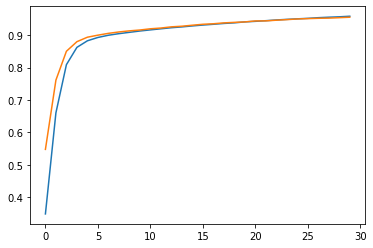

In [17]:
plt.plot(accuracy_train_arr)
plt.plot(accuracy_test_arr)


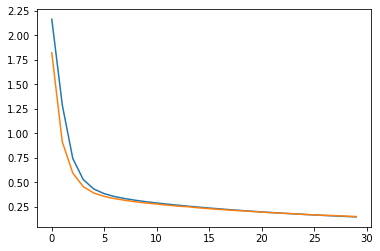

In [19]:
plt.plot(loss_train_arr)
plt.plot(loss_test_arr)

In [23]:
loss_train_arr[3]
loss_test_arr[3]

0.45607320461273193

In [14]:
#start training with batchsize 32
classifier = classification().to("cuda")
optimizer = torch.optim.SGD(classifier.parameters(), lr=learning_rate_value)
criterion = nn.NLLLoss()
batch_size=32
epochs = 10
loss_train=np.zeros(epochs)
accuracy_train=np.zeros(epochs)
loss_test=np.zeros(epochs)
accuracy_test=np.zeros(epochs)

batched_train = torch.utils.data.DataLoader(training_set, 32, shuffle=True)
batched_test = torch.utils.data.DataLoader(testing_set, 32, shuffle=True)


#train and compute loss, accuracy
for img, label in batched_train:
    img=img.to(device)
    optimizer.zero_grad()
    predicted = classifier.forward(img)
    label_predicted = torch.argmax(predicted,dim=1)
    print(predicted.shape)
    print(label.shape)
    loss = criterion(predicted, label)
    loss.backward
    optimizer.step()
    loss_train[i] += loss
    accuracy_train[i] += torch.sum(label_predicted==label)
    

    

torch.Size([32, 10])
torch.Size([32])


RuntimeError: Expected object of device type cuda but got device type cpu for argument #2 'target' in call to _thnn_nll_loss_forward

TypeError: 'DataLoader' object is not subscriptable

In [57]:
train_data_loader = torch.utils.data.DataLoader(training_set, 32, shuffle=True)


In [61]:
example_mini_batch_img, example_mini_batch_label  = next(iter(train_data_loader))
print(example_mini_batch_img.shape)

torch.Size([32, 1, 28, 28])


In [ ]:
def run_epoch (model, train_data, test_data, optimizer, criterion):
    
    for img_i, label_i in train_data:

        img_i, label_i = img_i.to(device), label_i.to(device)

        optimizer.zero_grad()

        # Forward
        label_predicted = mlp.forward(img_i.view(-1, 28*28))
        # Loss computation
        loss  = criterion(torch.log(label_predicted), label_i.view(-1))
        # Backward
        loss.backward()
        # Optimize for img_i
        optimizer.step()
    
    total_test_loss = 0
    for img_j, label_j in test_data:

        img_j, label_j = img_j.to(device), label_j.to(device)

        with torch.autograd.no_grad():
            label_predicted = mlp.forward(img_j.view(-1, 28*28))
            total_test_loss  += criterion(torch.log(label_predicted), label_j.view(-1)).item()

    end_time = time.time()
    return total_test_loss, (end_time - start_time)


optimizer = optim.Adam(mlp.parameters(), lr=0.0001)
criterion = nn.NLLLoss()

for epoch in range(3):
    test_loss, response = run_epoch (mlp, train_data, test_data, optimizer, criterion)
    print('epoch ', epoch, ': ')
    print('\ttest_loss: ', test_loss)
    print('\tresponse(s): ', response)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./MNIST
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )